# (01) Breast cancer detection: EDA



### Dataset overview
The dataset represents diagnostic measurements derived from digitized images of the fine needle aspirate (FNA) samples of breast masses. The features capture various geometric and stadistical properties of cell present in the images, **categorized into three main calculations**:
* **(1) Mean**: The average measurement for each feature across the sample 
    * suffix: `_mean`
* **(2) Standard Error (se)**: The variability or error in the measurements for each feature
    * suffix: `_se`
* **(3) Worst**: The largest measurement, typically computed as the mean of the three largest values 
    * suffix: `_worst`

### Columns *(base attributes)*
* **(1) ID**: identifier number for each patient/sample *(not relevant for the predictive analysis)*
* **(2) diagnosis**: Target value. Indicates wether the sumor is **M** $\rightarrow$ malignant (cancerous), **B** $\rightarrow$ benign (non cancerous). 
    * From now on, this values will be considerate as their mapped values:
        * **M** $= 0$
        * **B** $= 1$
* **(3) radius**: mean distance from the center of the nucleous to its perimeter
    * columns: *radius_mean*,  *radius_se*,  *radius_worst*
* **(4) texture**: measures the variation un te grayscale pixel intensity within the cell nucleus
    * columns: *texture_mean*,  *texture_se*,  *texture_worst*
* **(5) permimeter**: length of the boundary *(límite)* of the cell nucleous
    * columns: *perimeter_mean*,  *perimeter_se*,  *perimeter_worst*
* **(6) area**: total area enclosed within the cell nucleous boundary
    * column: *area_mean*,  *area_se*,  *area_worst*
* **(7) smoothness**: quantifies the local variation in radius length across the cell nucelous boundary
    * column: *smoothness_mean*,  *smoothness_se*,  *smoothness_worst*
* **(8) compactness**: represents the compactness of the nucleous, computed as: $(\frac{\text{perimeter}^2}{\text{area}-1})$
    * columns: *compactness_mean*,  *compactness_se*,  *compactness_worst*
* **(9) concavity**: Measures the severity of the concave portions on the contour of the nucleous
    * columns: *concavity_mean*, *concavity_se*, *concavity_worst*
* **(10) concave points**: counts the number of the concave points on the nucleous boundary
    * columns: *concave_points_mean*, *concave_points_se*, *concave_points_worst*
* **(11) symmetry**: quantifies the symmetry of the nucleus shape
    * columns: *symmetry_mean*, *symmetry_se*, *symmetry_worst*
* **(12) fractal dimension**: measures the complexity of the nucleus boundary, computed using a *coastline approximation*
    * columns: *fractal_dimension_mean*, *fractal_dimension_se*, *fractal_dimension_wrost*
* **Unnamed 32**: Likely empty/irrelevant column for this analysis

### target class distribution
**B**: $357$ samples,  **M**: $212$ samples
* since the number of the samples is not the same for both cases *(benign vs malignant)* the possibility of balancing will be analyced.


<div class="alert alert-info">
    <b style="font-size: 1.5em;">💭 Insights & Hypotheses</b>
    <br>
    <b style="font-size: 1.1em;">H1</b>
    <p>attibutes mos likely relevant:</p>
    <ol>
        <li><b>radius, perimeter, area:</b> Likely to be among the most influential predictors due their direct relation to tumor size</li>
        <li><b>smoothness, compactness, concavity</b>:  could indicate the irregularty and growth pattern of the tumor</li>
        <li><b>texture and fractal dim:</b> may provide aditional info about tumor complexity and structure, but its importance could be insignificant </li>      
</div>



### importing libraries, modules and dataset

In [1]:
#libraries
import os
import pandas as pd
import sys

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.pipeline      import Pipeline as IMB_pipeline

In [2]:
# root directory (to be able to import modules outside the current directory)
#os.chdir('..')  
ROOT_DIR = os.path.abspath('..')
sys.path.append(ROOT_DIR)

# own modules
from utils.utils_load_data import Loader
from utils.utils_initial_exploration import InitialExploration
from utils.utils_categorical_plots   import CategoricalPlots
from utils.utils_list_and_dicts      import ListAndDicts
from utils.utils_auxiliar_funcs      import AuxiliarFuncs

In [3]:
# instances
loader      = Loader()
initial_exp = InitialExploration()
catplots    = CategoricalPlots()
listdicts   = ListAndDicts()
aux_funcs   = AuxiliarFuncs()

In [4]:
# plot appearance
initial_exp.load_appereance()

In [5]:
# load dataset
data = loader.load_data(file_name= 'raw', dir= 'raw', copy= True)

# column order in -> "./utils/list_and_dicts.py"
df_raw = data[listdicts.sorted_all]  
df_raw = df_raw.drop(columns= ['id', 'Unnamed: 32'])
df_raw.head(3)

,diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,...,concavity_worst,concave points_mean,concave points_se,concave points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,M,17.99,1.0950,25.38,10.38,0.9053,17.33,122.8,8.589,184.6,...,0.7119,0.14710,0.01587,0.2654,0.2419,0.03003,0.4601,0.07871,0.006193,0.11890
1,M,20.57,0.5435,24.99,17.77,0.7339,23.41,132.9,3.398,158.8,...,0.2416,0.07017,0.01340,0.1860,0.1812,0.01389,0.2750,0.05667,0.003532,0.08902
2,M,19.69,0.7456,23.57,21.25,0.7869,25.53,130.0,4.585,152.5,...,0.4504,0.12790,0.02058,0.2430,0.2069,0.02250,0.3613,0.05999,0.004571,0.08758


### start of the analysis

## (1.1) initial exploration

In [6]:
initial_exp.initial_exploration(df_raw)

,type,not_null_count,null_count,null_percent
diagnosis,object,569,0,0.0
radius_mean,float64,569,0,0.0
radius_se,float64,569,0,0.0
radius_worst,float64,569,0,0.0
texture_mean,float64,569,0,0.0
texture_se,float64,569,0,0.0
texture_worst,float64,569,0,0.0
perimeter_mean,float64,569,0,0.0
perimeter_se,float64,569,0,0.0
perimeter_worst,float64,569,0,0.0


No explicit nulls found

## (1.2) potential implicit missing values
While the dataset explicitly states that there are no missing values, it is important to consider the possibility of implicit missing values. This can occur if certaint column contain a value of $0.0$, which in specifuc contexts, might not be a valid measurement but rather an indicator of missing data
<div class="alert alert-info">
    <b style="font-size: 1.5em;">case 1: 0.0 unlikely to be valid </b>
    <p>Physical measurements of the tumor's size or extent:</p>
    <ul>
        <li><code>radius_</code>, <code>perimeter_</code>, <code>area_</code></li>
    </ul>
    <b style="font-size: 1.5em;">case 2: 0.0 might be valid <i>(but rare)</i></b>
    <p>Tumor's shape and texture. **These instances should be rare warrant futher investigation</p>
    <ul>
        <li>shape: <code>compactness_</code>, <code>concavity_</code>, <code>concave_points_</code></li>
        <li>texture & symmetry: , <code>texture_</code>, <code>smoothness_</code>, <code>symmetry_</code>, <code>fractal_dimension_</code></li>
    </ul>

</div>


In [7]:
# count >= 0.0 values
# path: "./utils/auxiliar_funcs.py"
df_zeros, problematic_cols, row_index = (
    aux_funcs.find_zero_vals(df_raw.drop(columns= ['diagnosis']),
                                         return_all= True)
    )
df_zeros

,col_name,zero_count,zero_rows_index
0,concavity_mean,13,"[101, 140, 174, 175, 192, 314, 391, 473, 538, ..."
1,concavity_se,13,"[101, 140, 174, 175, 192, 314, 391, 473, 538, ..."
2,concavity_worst,13,"[101, 140, 174, 175, 192, 314, 391, 473, 538, ..."
3,concave points_mean,13,"[101, 140, 174, 175, 192, 314, 391, 473, 538, ..."
4,concave points_se,13,"[101, 140, 174, 175, 192, 314, 391, 473, 538, ..."
5,concave points_worst,13,"[101, 140, 174, 175, 192, 314, 391, 473, 538, ..."


In [8]:
df_raw[problematic_cols].iloc[row_index[0]][:5]

,concavity_mean,concavity_se,concavity_worst,concave points_mean,concave points_se,concave points_worst
101,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# problematic row example:
df_problematic = df_raw.iloc[row_index[0]]
df_problematic[:1].T

,101
diagnosis,B
radius_mean,6.981
radius_se,0.2241
radius_worst,7.93
texture_mean,13.43
texture_se,1.508
texture_worst,19.54
perimeter_mean,43.79
perimeter_se,1.553
perimeter_worst,50.41


In [10]:
zero_prop = len(row_index[0]) / df_raw.shape[0] * 100 # 13 / 569 * 100
print(f'percentage of rows with zero values: {zero_prop:.2f}%')

percentage of rows with zero values: 2.28%



<div class="alert alert-info">
    <b style="font-size: 1.5em;">Identified "problematic" rows</b>
    <p>A total of <b>13</b> rows out of <b>569</b> <i>(~2.28% of the total)</i> have <code>0.0</code> values in specific cols. These rows appear exclusively in <b>benign tumors</b>. 
    <p>The columns are: <i>'concavity_mean','concavity_se', 'concavity_worst','concave points_mean', 'concave points_se', 'concave points_worst'</i></p>
    <p>🔍 <b>insights:</b></p>
    <ul>
        <li>If a row has <code>0.0</code> in one of these cols, it has <code>0.0</code> in all of them (forming a consistent pattern)</p></li>
        <li> All  other measurements appear to have valid values in the identified "problematic" rows</li>
    </ul>
    <p>💭 <b>thoughts</b>: 
    <i class="tab4">"Let's suppose we are doing a medical study, in this study different complex calculations and measurements are made, test, etc. Now, let's suppose we are halfway through the study, and the results made so far point to the fact thath a person might have the disease, so we continue with the studies until the end. <br>However, there could be another case where the preliminary studies (or halfway through the analysis) the results point to the fact thath the patient is not sick, he es healthy. Therefore, the rest of the study would not be continued. But, why not finish the study? Why not do the remaining calculations and measurements? Because perhaps, medical resources are limited and is possible that, since we "would" have enough evidence to deduce that a person is not sick, then we would save resources for more complex studies"</i></p>
    <b style="font-size: 1.1em;">Is this can extrapolate to our case? <i>R: parcialy</i></b><p></p>
    <ul>
        <li>If benign tumors have perfectly regular contours(no concavities or concave spots), values of <code>0.0</code>in the problematic cols <i>"could"</i> be interpreted as preliminary indicator of benignity</p></li>
        <li>This values could mean that this features were no measured due to practical desicion in the data collection process: The analyst could have concluded that the morfology of the tumor war already sufficiently clear to determine that it was bening </li>
    <p><b>Counterargument:</b> These cases are very few in the dataset <i>(13 vs 569 -> ~2%)</i>. If this were standard procedure for benign tumors, we would expect to see many more rows with 0.0 in <code>diagnosis = B</code> cases</p>
    <br>
    <p><b>If <code>0.0</code> values represent a decision not to continue with measurements, we should find a clear and consistent pattern. Therefore they will not be deleted yet</b></p>
</div>

## (1.3) Problematic column EDA: potential missing values

In [11]:
df_benign    = df_raw[df_raw['diagnosis'] == 'B']
df_malignant = df_raw[df_raw['diagnosis'] == 'M']

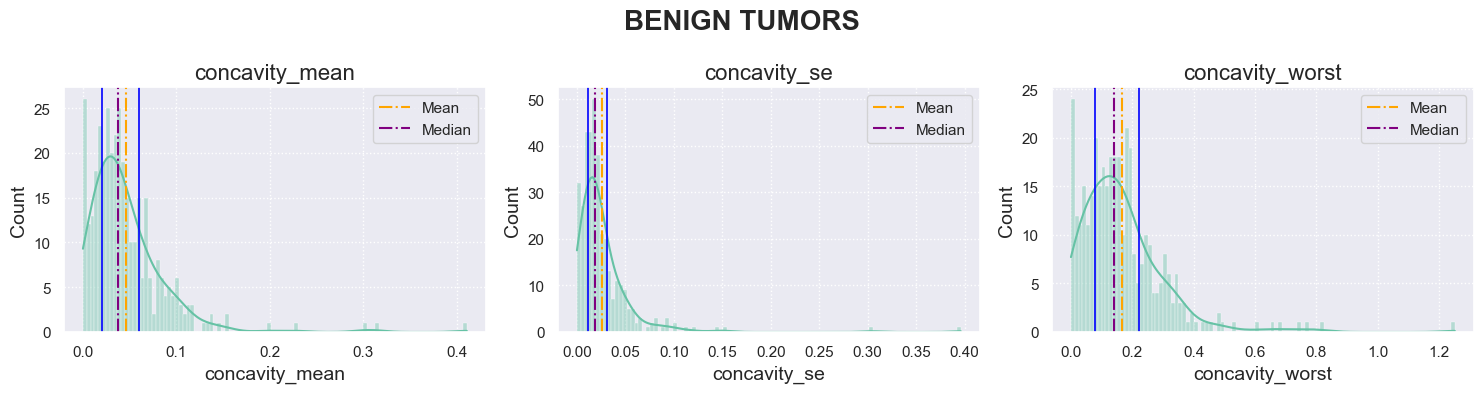

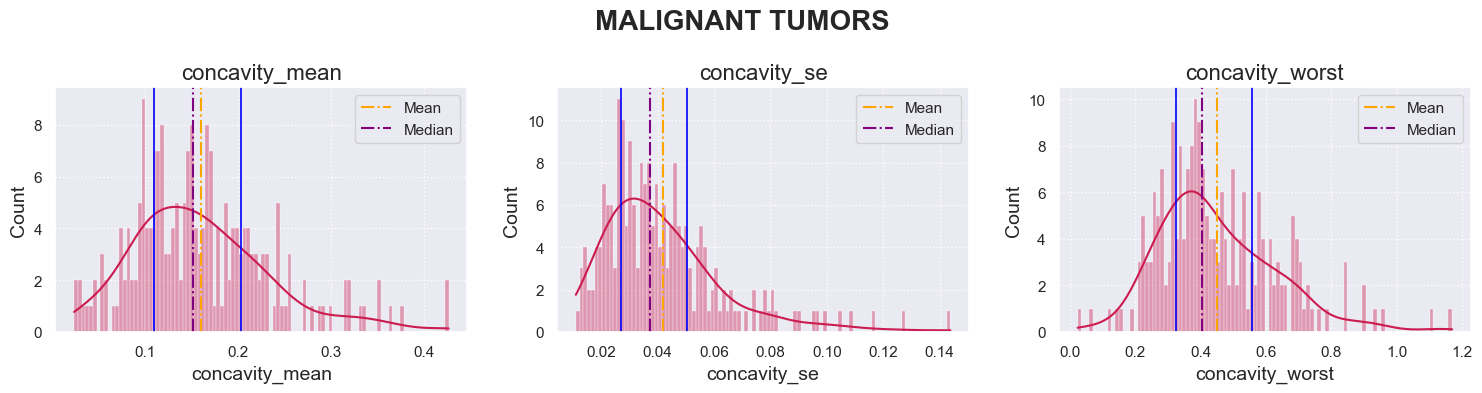

In [12]:
params = {'hue': 'diagnosis', 'kde': True, 'bins': 100}

catplots.plot_dist(df= df_benign, cols= problematic_cols[:3], hist_params= params,
                   palette= 'Set2', stats= True, title= 'Benign Tumors')

catplots.plot_dist(df= df_malignant, cols= problematic_cols[:3], hist_params= params,
                    palette= 'rocket', stats= True, title= 'Malignant Tumors')

Behavioral trends:
* Distributions with **benign** diagnoses tend to be positive $\rightarrow$ leptokurtic distributions *(more concentrated values and lower variance)*
* Distributions with **malignant** tumors tend to be positive $\rightarrow$ mesocurtic distributions *(sligthly more dispersed values and higher variance)*

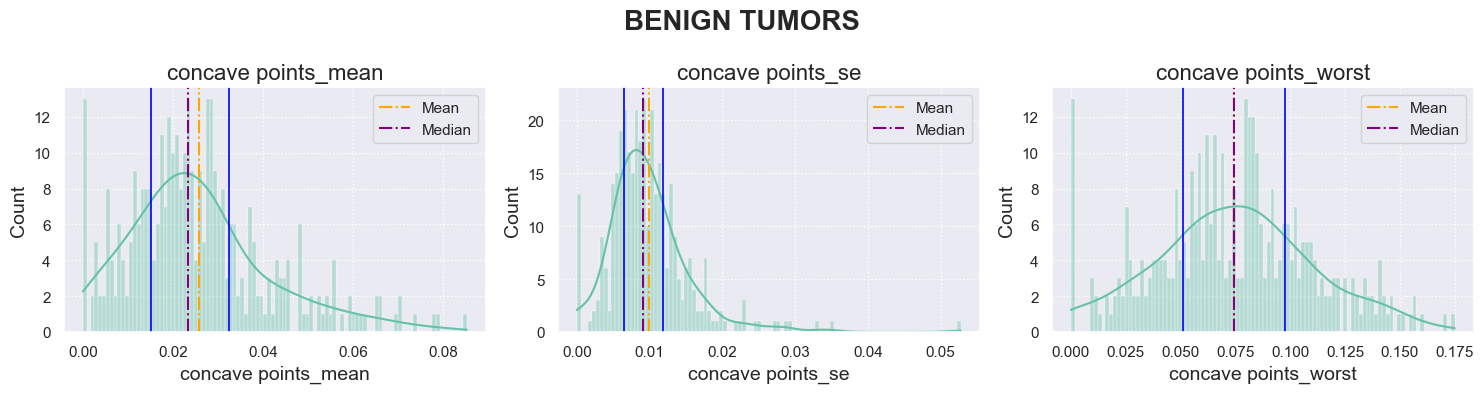

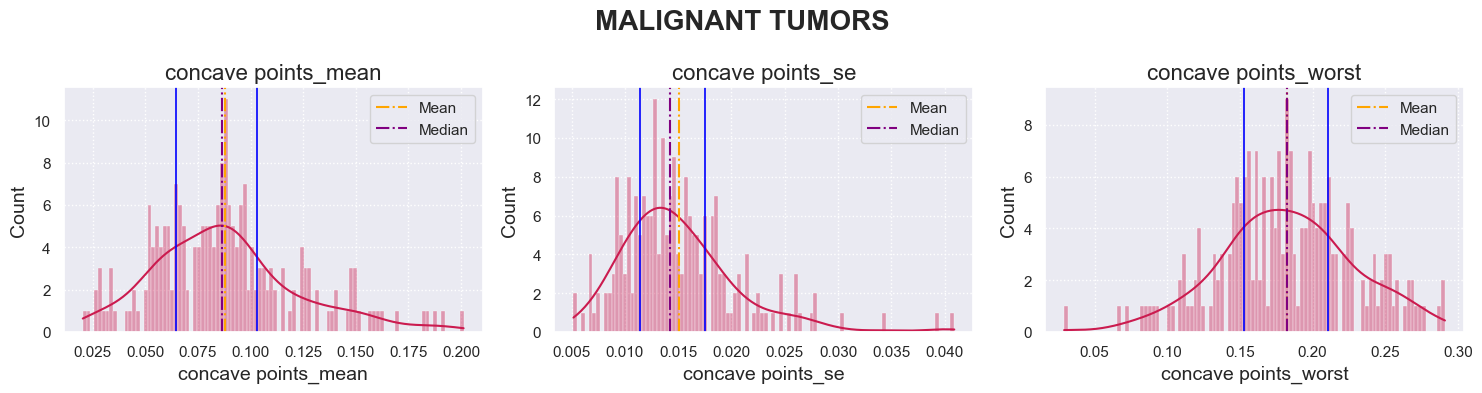

In [13]:
catplots.plot_dist(df= df_benign,   cols= problematic_cols[3:6], hist_params= params,
                   stats= True, palette= 'Set2', title= 'Benign Tumors')
catplots.plot_dist(df= df_malignant,cols= problematic_cols[3:6], hist_params= params,
                   stats= True, palette= 'rocket', title= 'Malignant Tumors')

In [14]:
aux_funcs.calc_problematic_props(df_raw, problematic_cols, 'diagnosis')

,0
Total rows,569
Total problematic rows,13
Proportion (problematic),2.28%
Total benign,357
Proportion benign (problematic),3.64%


From now, on the variable *diagnosis* will be mapped: 
* **M** (malignant) = $0$
* **B** (benign) = $1$

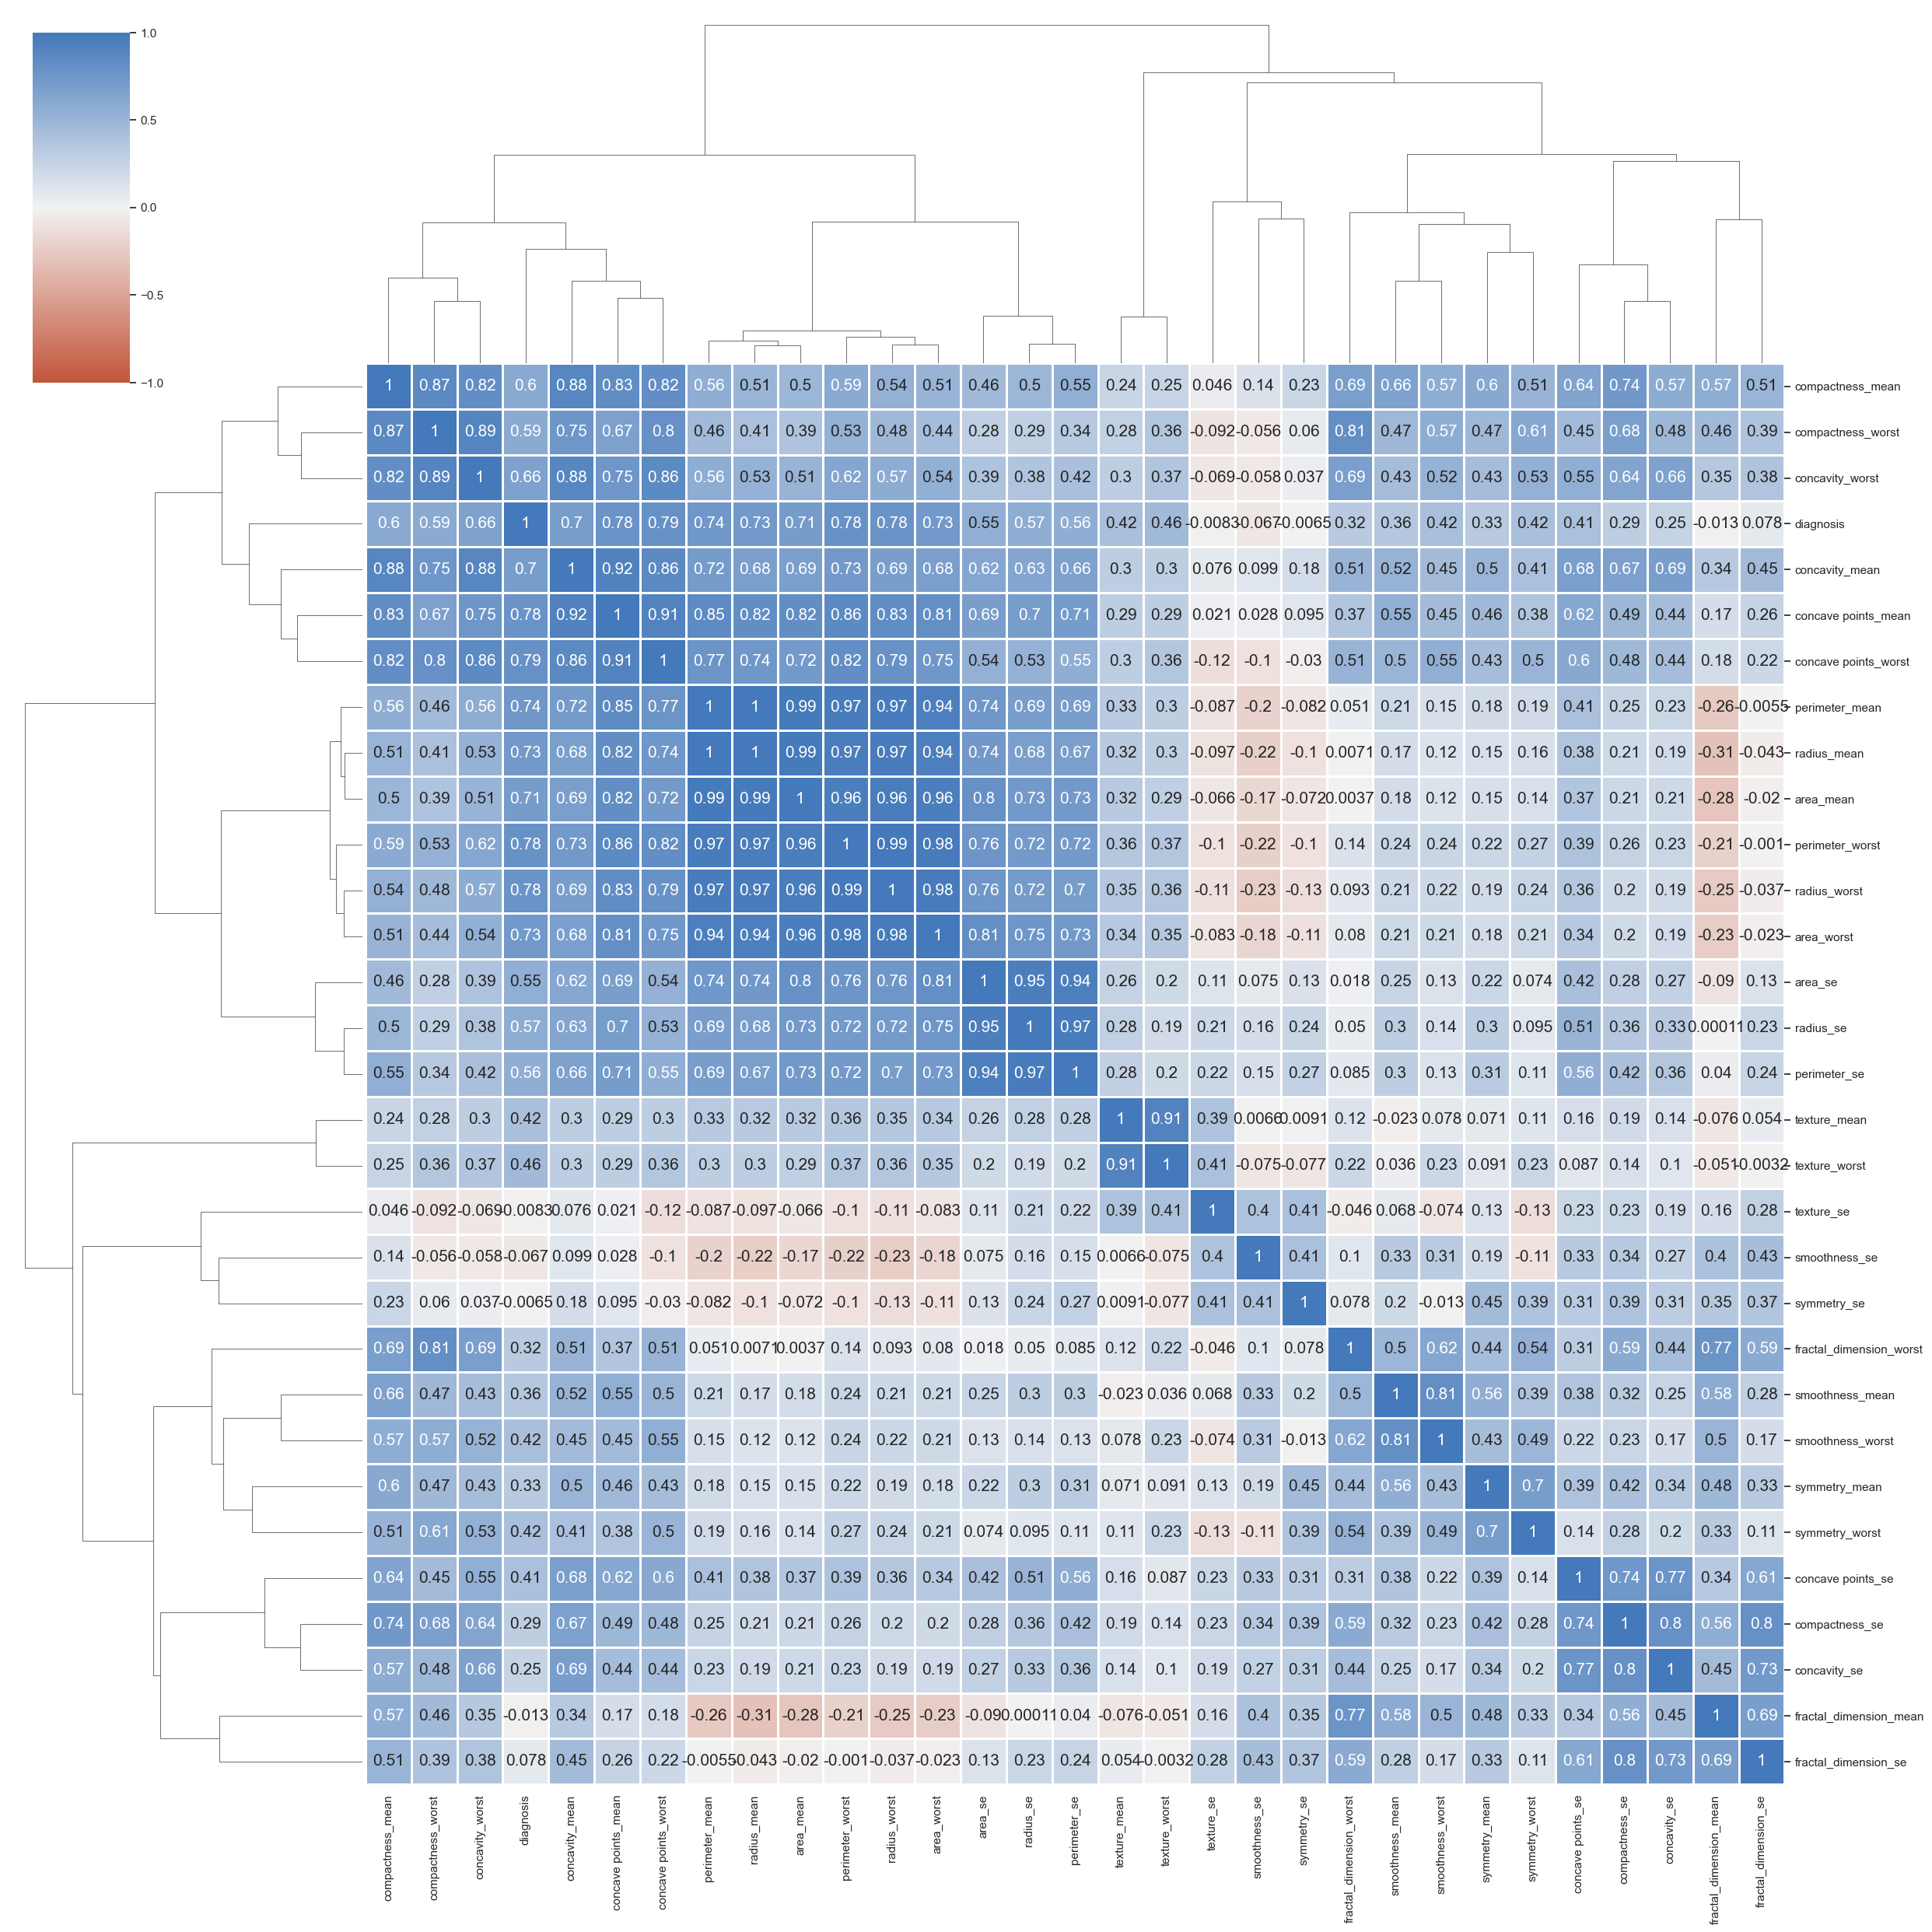

In [15]:
#diagnosis mapping (B = 0, M = 1)
df_raw['diagnosis'] = df_raw['diagnosis'].map({'B': 0, 'M': 1})

#Pearson correlation
initial_exp.correlation_plot(df= df_raw, columns= df_raw.columns, annot_size= 15, method= 'pearson',
                             type_plot= 'clustermap', fig_size= (25,25))

In [16]:
# hacer un scatterplot
# not necessary

In [17]:
# range of values
df_ranges = initial_exp.col_range_vals(df= df_raw, col= None)
df_ranges

,name,delta,min,max
0,diagnosis,1.00,0.000,1.000
1,radius_mean,21.13,6.981,28.110
2,radius_se,2.76,0.112,2.873
3,radius_worst,28.11,7.930,36.040
4,texture_mean,29.57,9.710,39.280
5,texture_se,4.52,0.360,4.885
6,texture_worst,37.52,12.020,49.540
7,perimeter_mean,144.71,43.790,188.500
8,perimeter_se,21.22,0.757,21.980
9,perimeter_worst,200.79,50.410,251.200


## summary of results:

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📊 Histograms</b>
    <p><b>(1) benign:</b></p>
    <ul>
        <li><i>concavity_*</i> and <i>concave_points_*</i> columns seems to have a <b>clear clustering at <code>0.0</code></b>, suggesting a consisten pattern in benign cases</li>
        <li> Most of the remaining values are very small, inidcatin that these variables <i>(concavity, concave_points)</i> are <b>minimal or non-existent in benign tumors</b></li>
    </ul>
    <p><b>(2) malign</b>:</p>
    <ul>
        <li>These columns show much wider distributions,  with significantly higher values in most cases.</li>
        <li>This reinforces the idea that <b><code>0.0</code> in benign tumors could be a reflection of specific biological characteristics of this type of tumor</b></li>
    </ul>
    <b style="font-size: 1.5em;">🧮 Proportions</b>
    <ul>
        <li>13 problematic rows represent only <b>~2.28%</b> of the total rows, and <b>~3.64%</b> of benign cases</li>
        <ul>
            <li>This indicates that the problematic rows are very small fraction of the dataset, wich may imply that they rare cases <i>(outliers)</i></li>
        </ul>
    </ul>
    <b style="font-size: 1.5em;">🧮 (linear) correlation</b>
    <ul>
        <li>the "problematic" columns: <i>concavity_*</i> and <i>concave_points_*</i> have extremely high correlations <b>(~0.99)</b> indicating that <b> they contain redundant info</b>.</li>
        <li>They also have a moderate/high correlation with features such as <i>compactness_*</i><b>(~0.7)</b>, sugesting that <b>these variables are related to tumor shape</b></li>
    </ul>
</div>
<div class="alert alert-success">
    <b style="font-size: 1.5em;">Are "problematic" cases implicit nulls? R: No</b>
    <p><code>0.0</code> vals appear exclusively in benign cases and show a clear pattern: if one problematic column has value of <code>0.0</code>, all the others do as well. This suggest that ther are not missing data, but rather a reflection od specific characteristics of these benign tumors</p>
    <b style="font-size: 1.5em;">Valid but rare cases</b>
    <p><code>0.0</code> are more likely to represent rare but valid cases. They <i>could</i> correspond to benign cases with extremely regular an smooth contours.</p>
    <ul>
        <li>Although these are few cases, this pattern can be informative for the model</li>
    </ul>
    <p><i>There is insufficient evidence to dclare the problematic rows as null data, on the contrary: <b>They are more likely to be rare but valid cases</b>, relfecting specific characteristis od a subset of benign cases</i></p>
      <ul>
        <li><i>Although these rows represent a small percentage of the dataset  <b>removing them could lead to loss of useful information</b></i></li>
    </ul>
</div>

## (1.4) Redundancy/multicollinearity analysis
We wil calculate the VIF (variance inflation factor) for the problematic cols, using only the rows with values other than `0.0`

In [18]:
# only rows with non-zero values
df_non_zero = df_raw[df_raw[problematic_cols].ne(0.000).all(axis= 1)].copy() # ne -> not equal

In [19]:
# pearson corr, mutual information and VIF
vif_results  = aux_funcs.calculate_VIF(df= df_non_zero, cols= problematic_cols)
mi_results   = aux_funcs.calculate_mutual_information(df= df_non_zero,
                                                      cols= problematic_cols,
                                                      target_col= 'diagnosis')

cols_to_analyze = problematic_cols + ['diagnosis']
pearson_corr    = df_non_zero[cols_to_analyze].corr()['diagnosis'] 
               # "[problematic_cols + ['diagnosis_MAP']]" -> columns to calculate the corr with the target column
               # "['diagnosis_MAP']" -> ONLY the correlation with the target column
               
print(f'VIF results: \n{vif_results}\n')
print(f'PEARSON CORRELATION (diagnosis): \n{pearson_corr}\n')
print(f'MUTUAL INFORMATION: \n{mi_results}')

Mutual Information calculated for 6 columns
VIF results: 
                 Column        VIF
0        concavity_mean  99.543818
1          concavity_se  19.386967
2       concavity_worst  45.674553
3   concave points_mean  97.585241
4     concave points_se  21.356467
5  concave points_worst  75.000968

PEARSON CORRELATION (diagnosis): 
concavity_mean          0.691133
concavity_se            0.239474
concavity_worst         0.653709
concave points_mean     0.773706
concave points_se       0.393402
concave points_worst    0.796344
diagnosis               1.000000
Name: diagnosis, dtype: float64

MUTUAL INFORMATION: 
                 Column  mutual_info
3   concave points_mean     0.439279
5  concave points_worst     0.435290
0        concavity_mean     0.372484
2       concavity_worst     0.311830
4     concave points_se     0.120661
1          concavity_se     0.109393



### results
<div class="alert alert-info">
    <p>The <b>VIF</b> confirms the correlation that the problematic columns are highly redundant, so most of them could be removed. Both Pearson and <b>MI</b> conicide in especially in three columns as the mos relevant</p>
    <ul>
        <li>In adition, the correlation between the problematic columns is alse high, so it would be the best to choose only <i>concave points_worst</i>because it is the one with the best score in <b>MI</b> and becouse it is the on with the highest correlation between the target variable</li>
    </ul>
    </div>
    <div class="alert alert-warning">
    <p><b>Next steps</b>: since a <b>high multicollinearity</b> has been found in these variables, it is possible that there is also a high multicollinearity in the others, if this is the case, then it will be best to apply a PCA.</p>
    <ul><li><b>Standardization will be applied</b> to the columns to see how much their behavior changes in the VIF</li></ul>
</div>

In [20]:
# exclude target
selected_cols = [col for col in df_raw.columns if col != 'diagnosis'] 

# normalize data (X's) & map (y)
df_normalized, scaler = aux_funcs.normalize_data(df= df_raw, cols_to_scale= selected_cols)
# VIF
aux_funcs.calculate_VIF(df= df_normalized, cols= selected_cols)

,Column,VIF
0,radius_mean,3806.115296
1,radius_se,75.462027
2,radius_worst,799.105946
3,texture_mean,11.884048
4,texture_se,4.205423
5,texture_worst,18.569966
6,perimeter_mean,3786.400419
7,perimeter_se,70.359695
8,perimeter_worst,405.023336
9,area_mean,347.878657


<div class="alert alert-info">
    <p>Muliticollinearity is signifantly high in all the columns, also we hace identified that there is a string positive linear relationship in most of the columns. Given this situation, there two ways to solve this problem:</p>
    <ol>
        <li><b>PCA</b>: Handles multicollinearity by design because it transforms correlated columns into orthogonal (independent) component automatically eliminating this issue</li>
        <li><b>VIF + clustermap (selecting columns manually)</b>: Using this method wuld help to identify correlated columns, selecting one variable for each cluster such that it has an acceptable value in the VIF. Although this could help to reduce the multicollinearity issue, the first process (PCA) is more efficient in our context</li>
        <ul>
            <li>💭 <i>If, on the contrary, the objective had benn to use a model that does NOT  handle multicollinearity (such multiple regression), these steps would be essential</i></li>
        </ul>
    </ol>
    </div>

## (1.5) Statistic analysis (raw data)

In [21]:
#statistic analysis (before balancing, PCA & normalization)
df_describe = df_raw.describe().transpose()
df_describe

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
radius_worst,569.0,16.269190,4.833242,7.930000,13.010000,14.970000,18.790000,36.04000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
texture_worst,569.0,25.677223,6.146258,12.020000,21.080000,25.410000,29.720000,49.54000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
perimeter_se,569.0,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.98000
perimeter_worst,569.0,107.261213,33.602542,50.410000,84.110000,97.660000,125.400000,251.20000


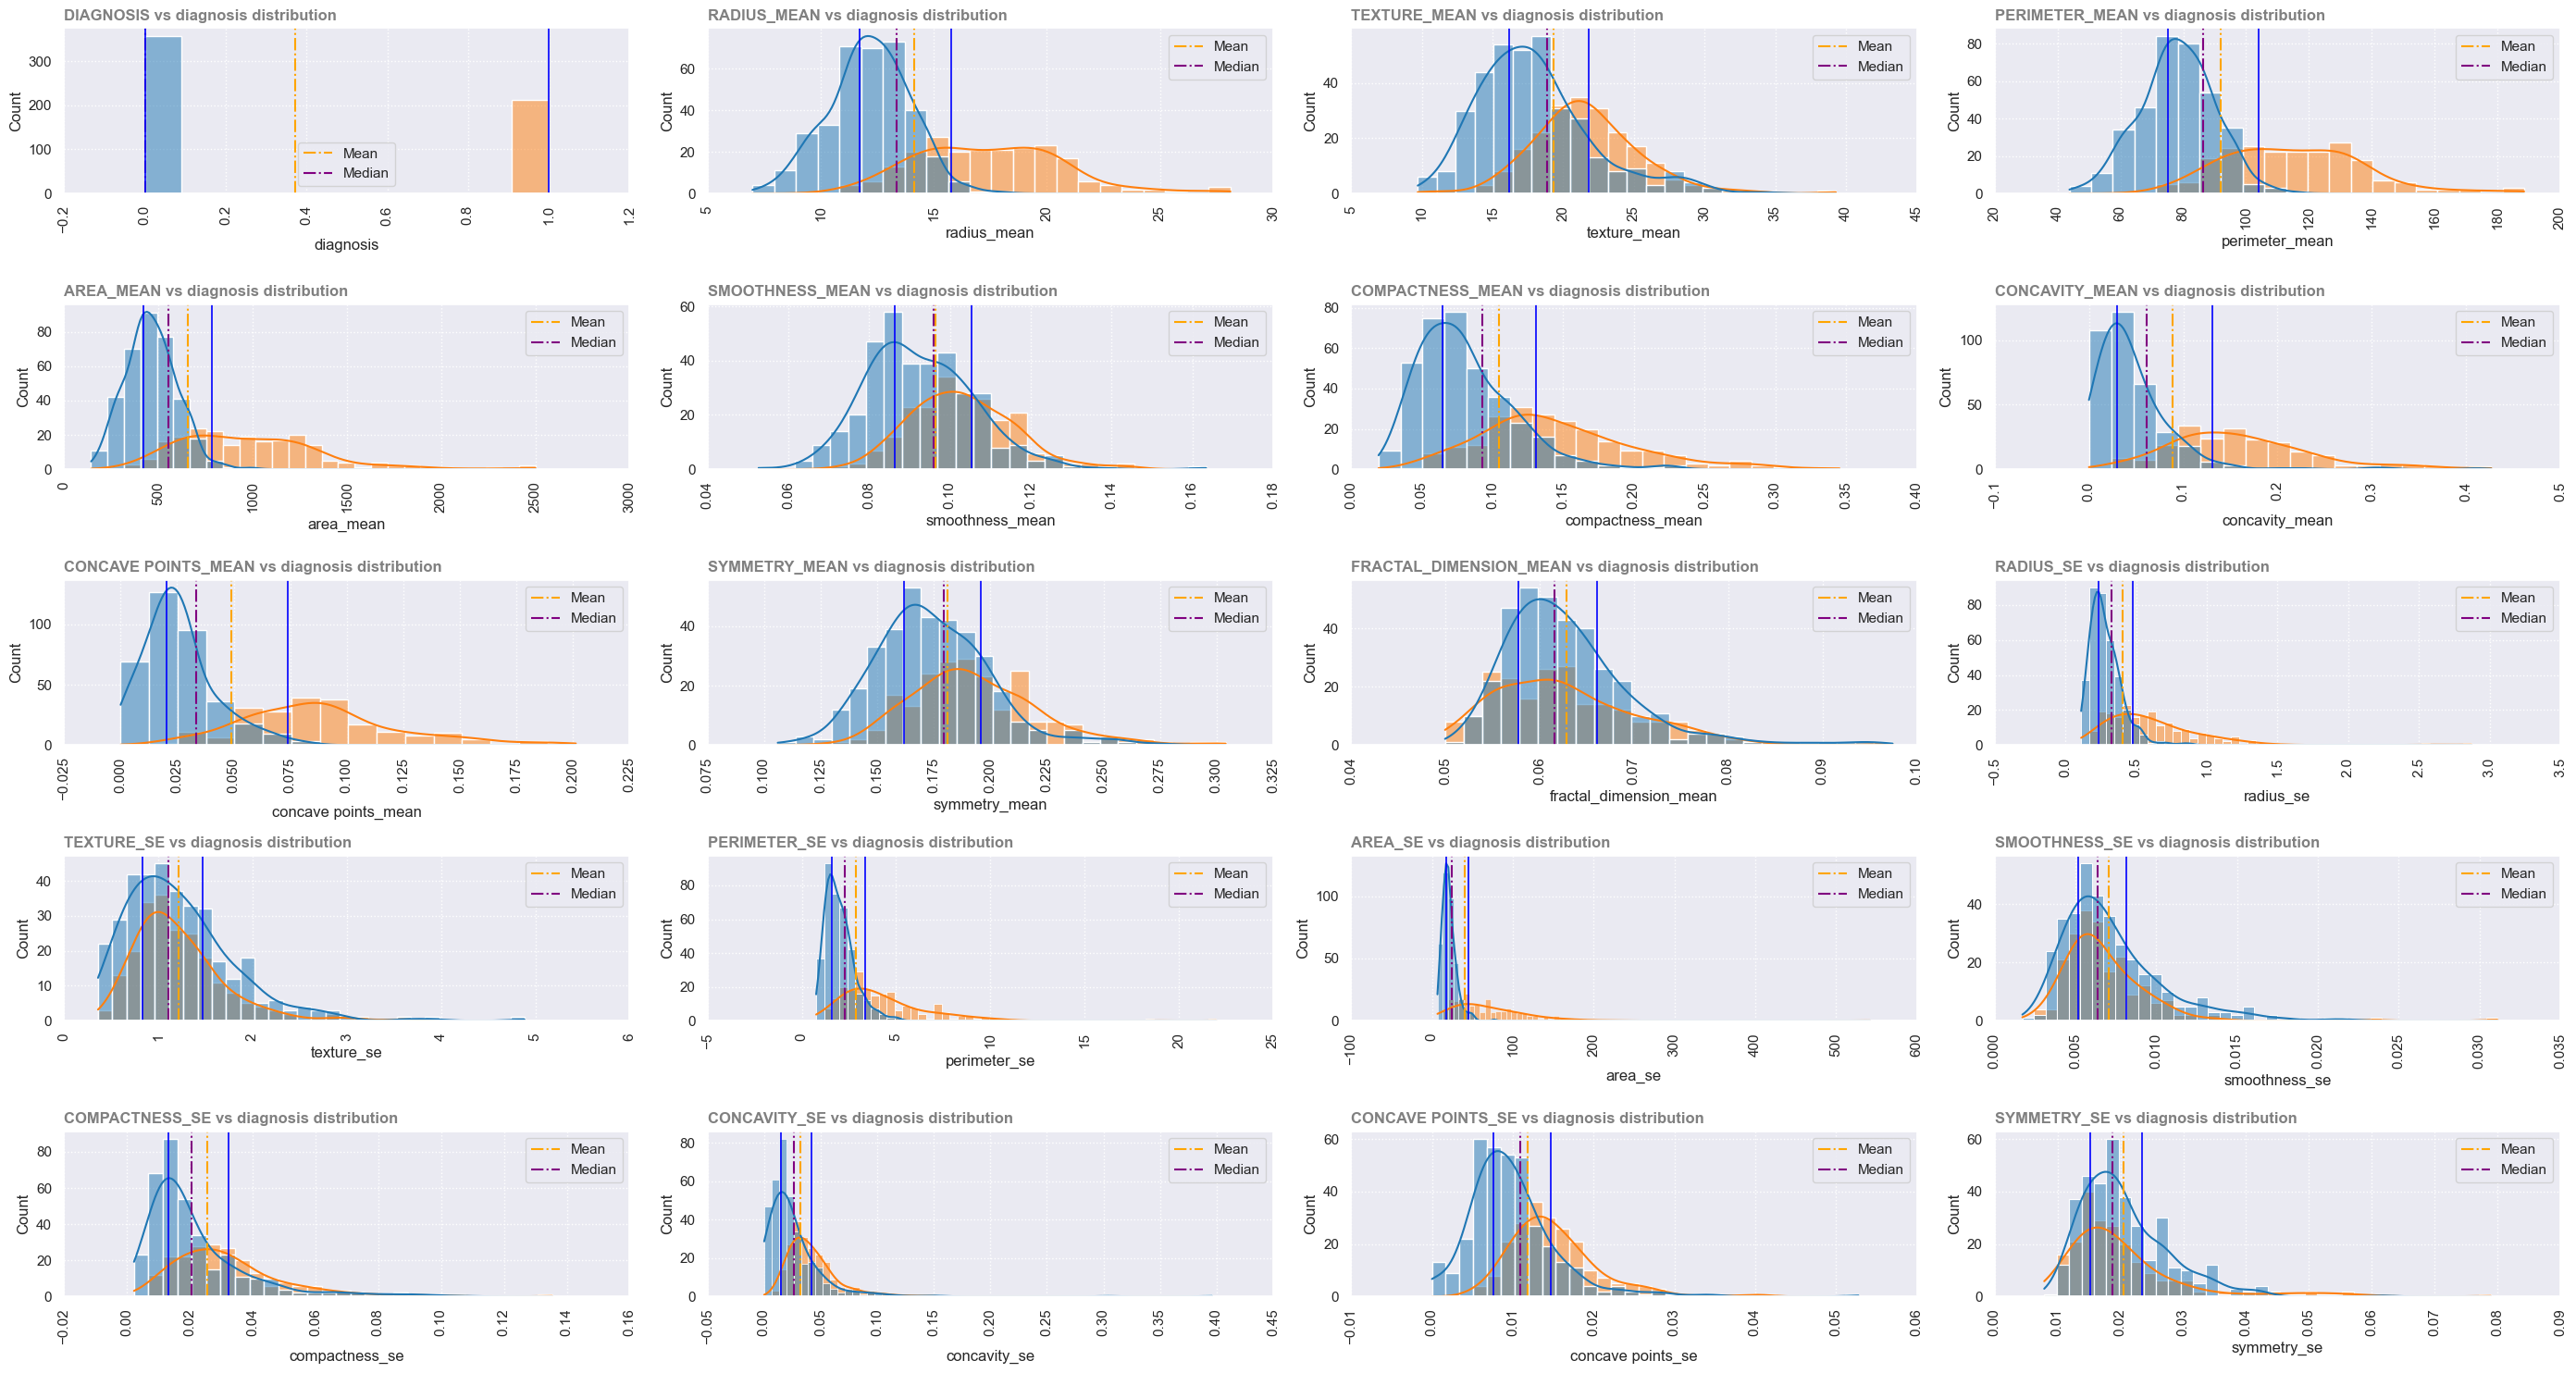

In [22]:
# plots (target[count] vs features BEFORE PCA & normalization)

cols_to_plot = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
                'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
                'concave points_se', 'symmetry_se']

catplots.multiple_histplots(df= df_raw, cols= cols_to_plot, target= 'diagnosis', plot_per_row= 4,
                            rotation= 90, use_y= False, fig_size= [7, 3], stats= True)
# BLUE -> Benign(0), ORANGE -> Malignant(1)

<div class="alert alert-info">
    <b style="font-size: 1.3em;">🔍 insights obtained (stats)</b>
    <ol>
        <li><b>variability of scales</b>: Since several columns have different ranges <i>(given the type of calculation or measurement they contain)</i>, <b>it is important to scale the values</b>, such that all the columns contribute in a balanced way to the model</li>
        <ul>
            <li><b>most notable cases</b>: <i>area_worst</i><b>(min= 185, max= 4254)</b> vs <i>smoothness_se</i><b>(min= 0.0017, max= 0.031)</b></li>
        </ul>
        <li><b>outliers</b>: Some columns have maximum vbalues that appear quite far from the upper percentiles. Would be important to confirm that with <i>histograms + KDE</i></li>
        <ul>
            <li><b>most notable cases</b>: <i>area_mean</i><b>(q3= 782, max= 2501)</b> vs <i>area_worst</i><b>(q3= 1084, max= 4254)</b></li>
        </ul>
        <li><b>distributions</b>: most columns have mean values<i>(average)</i> close to Q2<i>(median)</i> wich suggest almost symmetrical distributions, except fot the area cols</li>
        <li><b>result coincidence</b>:The results obtained in new mutual information <i>(with the target variable mapped)</i> have coincided with those variables that have high correlation in te cloustermat</li>
    </ol>
    <p>There is a predominant linear relationship that is confirmed by the resuls obtained both: (Mutual Information and pearson correlation). If there were important non-linear relationships, MI would have identified additional variables, wich has not occured.</p>
    <ul>
        <li>In addition, it is observed that the variables whose attibute is: <i>radius_*</i>, <i>perimeter_*</i>, <i>area_*</i> have high redundancy between them. Wich means we could rule out several of these and keep just a few of them.</li>
    </ul>
</div>

<div class="alert alert-info">
    <b style="font-size: 1.3em;">🔍 insights obtained (plots)</b>
    <ul>
        <li><b>benign</b> related values show leptokurtic distributions with a positive tendency (more concentrated values with lower variance)</li>
        <ul>
            <li>💭 <i>This is consistent with typical behavior of benign tumors, wich tend to be <b>smaller and less complex shapes</b></i></li>
        </ul>
        <li><b>malignant</b> related values show platykurtic distributions in the columns: <i>radius_*, area_*, perimeter_*</i> while the remaining ones show mesokurtic distibutions, covering a wider range. Indicating a greater heterogeneity in the characteristics of malignant tumors</li>
        <ul>
            <li>Also, <b>tumors with atypical values</b> (especially un physical measurements) <b>tend to be malignant</b></li>
        </ul>
        <li> <b>positive bias</b>: Almost every distribution of the dataset tend to positive bias, which is typical in medical datasets</li>
    </ul>
    <b>conclusiones:</b>
    <ol>
        <li>The concentration of values in benign tumors could reflect the uniformity in the characteristics of non-malignant tumor, while malignant tumors, being more heterogeneous, do not have this behavior</li>
        <li>In none of the cases where the diagnosis is malignant, a <b>leptokurtic</b> behavior is shown, so we could consider it as a characteristic <b>intrinsically associated with benign tumors; thus, could be asossiated as a metric to identify benign tumors</b></li>
    </ol>
</div>

## (1.6) Data balancing & PCA

<div class="alert alert-info">
    <b style="font-size: 1.5em;">🤺 Stragegy</b>
    <p>Given the results obtained and decisions made. This is a roadmap of things to do: </p> 
    <ul>
        <li>Statistic analysis with the raw data and data visualisation</li>
        <li>We've already noticed that the target column has an <b>imbalance between its two categories</b>. 
        <ul>
            <li>Given this situation, and given the structure of the data we have confirmed that the best method to compose the multicollinearity problem will be a PCA, we will continue the process with the following work pipeline <i>(to improve the reproducibility, treatment and reproducibility of the process, we will encapsulate it in a function)</i></li>
        </ul>
        </li>
        <p>We will start with the <b>raw</b> data</p>
        <ol>
            <li><b>Normalization</b> of training columns (excluding target column)</li>
            <li>Apply a <b>balancing technique</b> <i>(since the difference between the majority and minority class is very small, the best option is to do a <code>SMOTE|BorderlineSmote</code>)</i></li>
            <li><b>PCA</b>, finding the ideal k value for the data. Studying this result by means of an explained variance</li>
            <li><b>Evaluate the performance</b> of the results by means of a classification model</li>
        </ol>
        <li>Then, we'll do a general <b>EDA</b> analysis of the columns before doing the PCA & balance process</li>
    </ul>
    <i>having confirmed that this is the best pipeline, we'll continue with the model trainning process using those steps</i>
    </div>

    
</div>

In [23]:
#diagnosis mapping (B = 0, M = 1)
print(f'shape: {df_raw.shape}')
df_raw['diagnosis'].value_counts()


shape: (569, 31)


diagnosis
0    357
1    212
Name: count, dtype: int64

In [24]:
# X,y to be used in the pipeline
X_raw = df_raw.drop(columns= 'diagnosis')
y_raw = df_raw['diagnosis']

# data balance strategies (in order to compare them)
sampler_smote      = SMOTE(random_state= 42)
sampler_borderline = BorderlineSMOTE(random_state= 42)

- ✅ Best validation score (CV) with SMOTE: 0.9948400412796697
- 🔍 Best Hyperparameters:
 {'classifier__C': 1, 'classifier__solver': 'lbfgs', 'sampler__k_neighbors': 5}
-*--*--*--*--*--*--*--*--*--*-


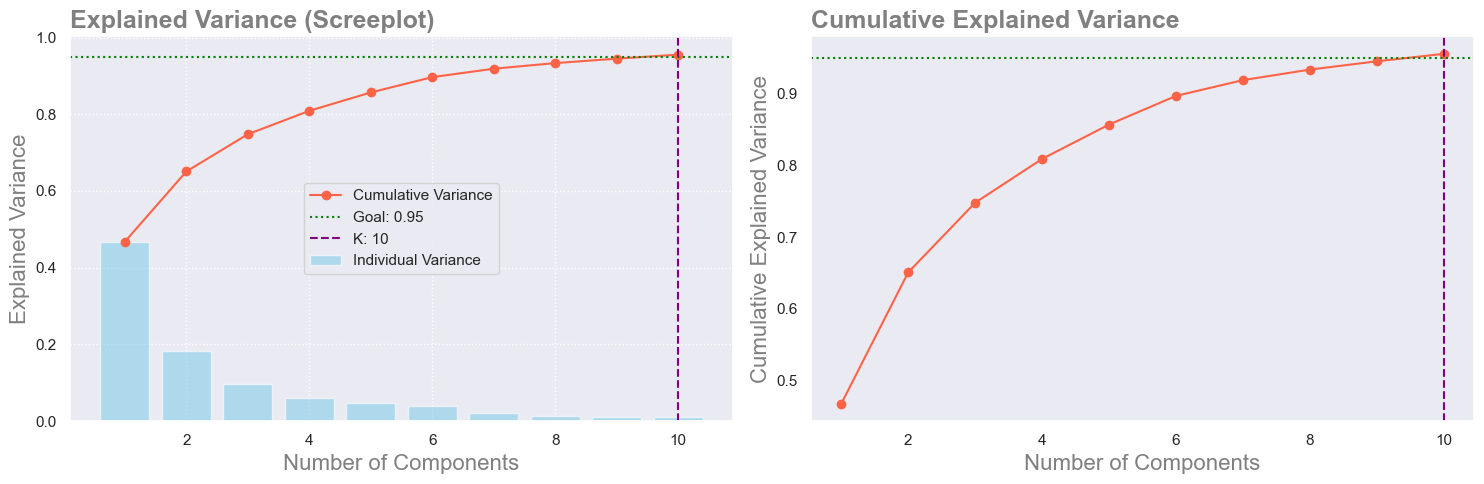

In [25]:
# SMOTE strategy -> suffix "_sm"
smote_model, X_train_sm, X_test_sm, y_train_sm, y_test_sm, scaler_sm, pca_sm = (
    # path -> ./utils/auxiliar_funcs.py - func ()
    aux_funcs.perform_data_balancing(X_raw= X_raw, y_raw= y_raw,
                                     sampler = sampler_smote,
                                     pca_variance_target= 0.95,
                                     plot_variance= True,
                                     return_preprocesors= True)
)

In order to seee how each **original** column contributes to each of the main components we're gona use a clustermap with a loading matrix from PCA (PCA Loadings) 
* PC's will be grouped according to their variance patterns

- ✅ Best validation score (CV) with SMOTE: 0.9943240454076367
- 🔍 Best Hyperparameters:
 {'classifier__C': 0.1, 'classifier__solver': 'lbfgs', 'sampler__k_neighbors': 3}
-*--*--*--*--*--*--*--*--*--*-


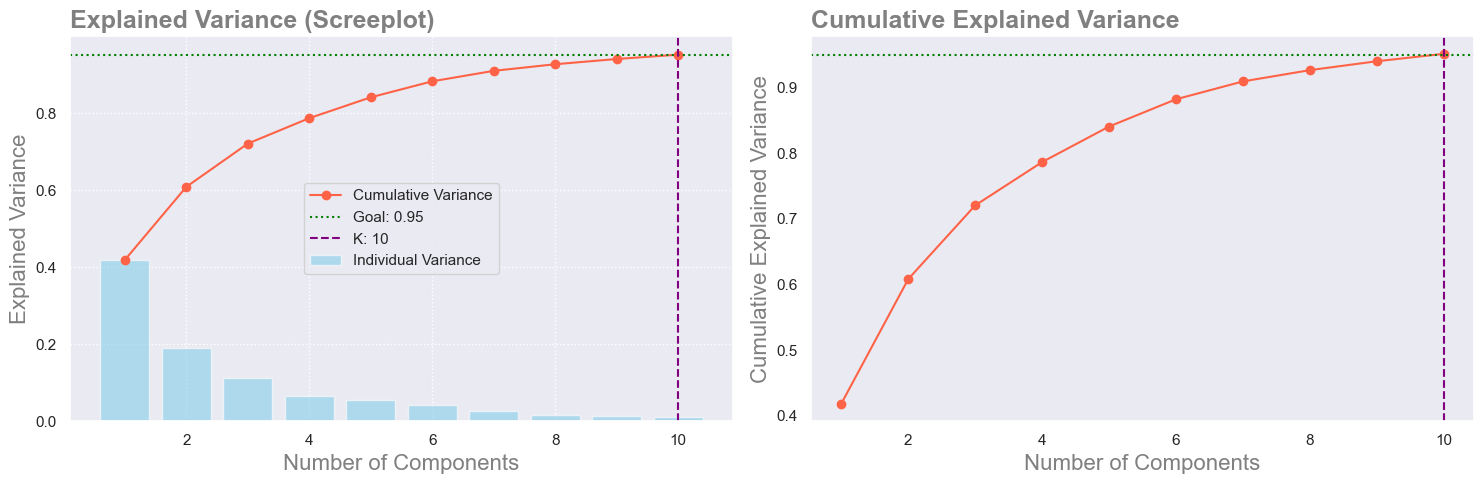

In [26]:
# Borderline Strategy -> suffix "_bor"
borderline_model, X_train_bor, X_test_bor, y_train_bor, y_test_bor, scaler_bor, pca_bor = (
    aux_funcs
    .perform_data_balancing(X_raw = X_raw, y_raw= y_raw,
                            sampler= sampler_borderline,
                            pca_variance_target= 0.95,
                            plot_variance= True,
                            return_preprocesors= True)
    )

In [27]:
initial_exp.shape(data_list= [X_train_sm, X_test_sm, y_train_sm, y_test_sm],
                  col_names= ['X_train_sm', 'X_test_sm', 'y_train_sm', 'y_test_sm'] )

Shape:
- X_train_sm: (570, 10)
- X_test_sm: (114, 30)
- y_train_sm: (570,)
- y_test_sm: (114,)


In [28]:
y_train_sm.value_counts()

diagnosis
1    285
0    285
Name: count, dtype: int64

results

<div class="alert alert-info">
    <b style="font-size: 1.3em;">🔍 Observations:</b>
    <ul>
        <li><b>SMOTE</b>: Performed sligthly better in cross-validation, although the difference is minimal (0.0005  difference in ROC AUC)</li>
        <li><b>BorderlineSMOTE</b>: Selected <b>lower regularization</b> (C = 0.1) and fewer neighbors in the interpolation (k_neighbors= 3), indicating that the model with BorderlineSmote is mote conservative</li>
        <li>The hyperparameter <i>k_neighbors</i> is very relevant for balancing process. In SMOTE (k = 5), wich generates synthetic examples from more neighbors. In BorderlineSMOTE (k = 3) wich can make the synthetic data closer to class boundary</li>
    </ul>
    <p>SMOTE will be chosen given its better performance, however the model trainning analysis will be taken into accoint. Consideinr that our research is a <b>medical dataset</b>, ther could be cases where BorderlineSMOTE could have better performance in cases of ambiguous diagnosis</p>
</div>

In [29]:
# Dataframe (normalized -> balanced -> PCA)
df_balanced = pd.DataFrame(X_train_sm)
df_balanced['diagnosis'] = y_train_sm
df_balanced.head(2)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,diagnosis
0,-1.477184,-2.451403,-0.893325,1.476884,0.160196,0.208723,-0.561867,-0.141684,-0.332577,0.393456,1
1,-3.190568,0.212680,0.042603,-2.511736,-0.572844,-0.052576,1.082817,-0.015232,0.619042,0.259248,0


In [30]:
is_null = ('not nulls' if df_balanced.isnull().sum().sum() == 0
           else 'there are nulls')
view_if_balanced = df_balanced['diagnosis'].value_counts()

print(f'Is null: {is_null}\n {view_if_balanced}')

Is null: not nulls
 diagnosis
1    285
0    285
Name: count, dtype: int64


<div class="alert alert-info">
    <b style="font-size: 1.3em;">🔍 insights obtained</b>
    <ul>
        <li><b>PC4 and PC8</b>: capture similar relationships not found in PCS like <b>PC1</b> or <b>PC3</b>. Specifically un the columns: <i>texture_mean, texture_worst</i></li>
        <ul>
            <li><i>this indicates that  different PC's are extracting unique information from de dataset</i></li>
        </ul>
        <li><b>PC1 and PC2</b>: are strongly dominated by the attributes <i>radius_, perimeter_, area_</i></li>
        <li><b>PC6</b>: is strongly influenced by <i>smoothness, symmetry mean</i></li>
    </ul>
    <p><b>Summary</b>: Each principal component captures unique information, and variables such as texture_mean, smoothness_se, and concave points_* emerge as keys for certain PCs.</p>
</div>

<div class="alert alert-success">
    <b style="font-size: 1.8em;">Summary of main processes performed</b>
    <ol>
    <li><b>analysis of anomalous data (0.000)</b>: Found that they were not null but outliers that helped to explain the behavior of observations in benign tumors</li>
    <li><b>Elimination of imbalances</b></li>
    <li><b>Dimensional reduction with PCA</b>: Solved de redundandcy & multicollinearity issue. Saving only the most relevant elements for each value</li>
    <li><b>Why overfitting is not a problem?</b>
        <ul>
            <li>Used <i>StratifiedKFold</i> & <i>cross-validation</i> during balanancing pipeline to ensure that the data is partitioned representatively in each fold. In adition, the regularization included in the selected Logistic Selection (C param) also helps to control overfitting</li>
        </ul>
    </li>
    </ul>

<Figure size 1200x800 with 0 Axes>

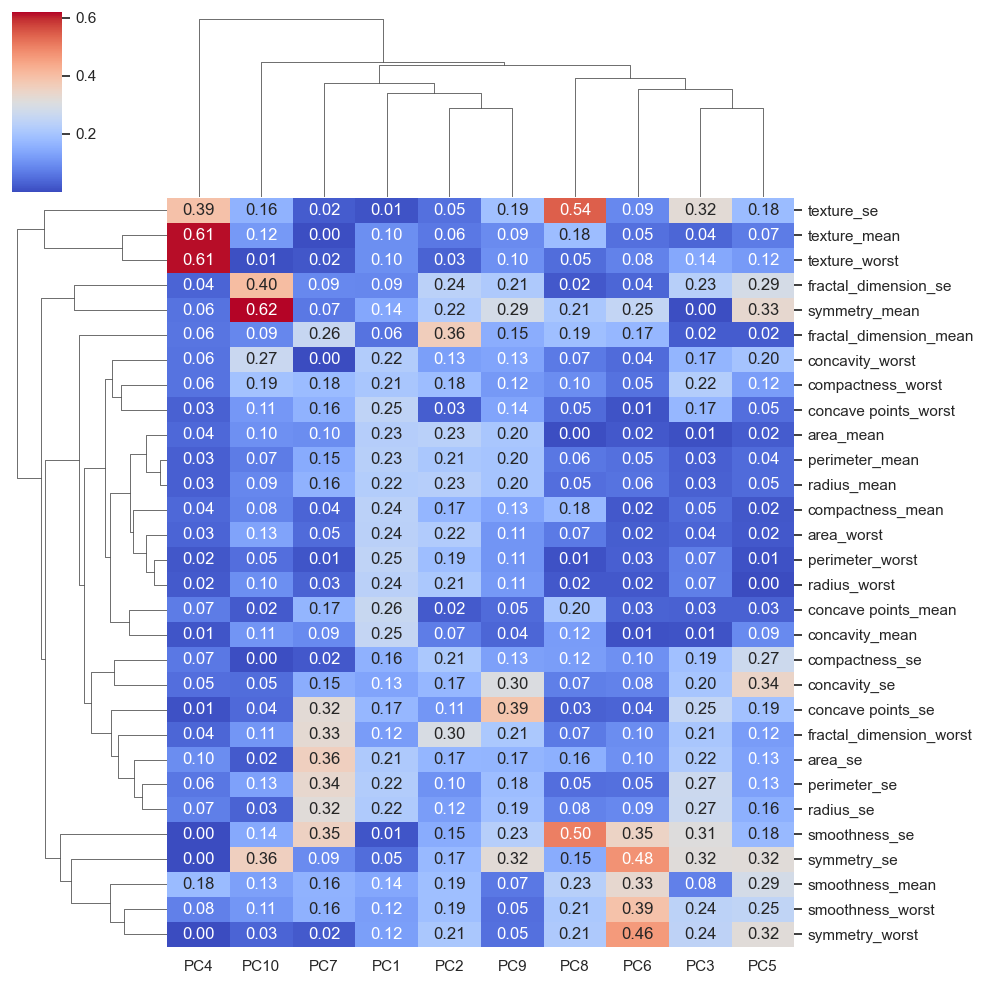

In [31]:
# analize PC loagings (post PCA)
best_estimator = smote_model.best_estimator_['pca']
pc_cols = df_raw.drop(columns= 'diagnosis').columns
 
smote_pc_loadings = aux_funcs.analyze_pca_loadings(pca= best_estimator,
                                                   plot_method= 'clustermap',
                                                   feature_names= pc_cols)
# red -> high loadings, blue -> low loadings

<div class="alert alert-info">
    <b style="font-size: 1.3em;">🔍 insights obtained</b>
    <ul>
        <li><b>PC4 and PC8</b>: capture similar relationships not found in PCS like <b>PC1</b> or <b>PC3</b>. Specifically un the columns: <i>texture_mean, texture_worst</i></li>
        <ul>
            <li><i>this indicates that  different PC's are extracting unique information from de dataset</i></li>
        </ul>
        <li><b>PC1 and PC2</b>: are strongly dominated by the attributes <i>radius_, perimeter_, area_</i></li>
        <li><b>PC6</b>: is strongly influenced by <i>smoothness, symmetry mean</i></li>
    </ul>
    <p><b>Summary</b>: Each principal component captures unique information, and variables such as texture_mean, smoothness_se, and concave points_* emerge as keys for certain PCs.</p>
</div>

<div class="alert alert-success">
    <b style="font-size: 1.8em;">Summary of main processes performed</b>
    <ol>
    <li><b>analysis of anomalous data (0.000)</b>: Found that they were not null but outliers that helped to explain the behavior of observations in benign tumors</li>
    <li><b>Elimination of imbalances</b></li>
    <li><b>Dimensional reduction with PCA</b>: Solved de redundandcy & multicollinearity issue. Saving only the most relevant elements for each value</li>
    <li><b>Why overfitting is not a problem?</b>
        <ul>
            <li>Used <i>StratifiedKFold</i> & <i>cross-validation</i> during balanancing pipeline to ensure that the data is partitioned representatively in each fold. In adition, the regularization included in the selected Logistic Selection (C param) also helps to control overfitting</li>
        </ul>
    </li>
    </ul>

 

<div class="alert alert-info">
    <b style="font-size: 1.8em;">next steps</b>
    <p> Our experiments have shown that SMOTE is the best method to work with the data, as evidenced by its performance and correlation analysis. However, the entire preprocessed dataset (normalized, balanced, and PCA-transformed) used during analysis will not be directly integrated into the final model.</p>
    <p> In the next notebook, we will implement the training function <b>from scratch using raw data</b> and integrate the <i>normalization, balancing, and PCA</i> stages within a single pipeline.</p>
    <ul><li>By doing so, when saving the final model, the scaler and PCA objects will be included. This is crucial because, in production, new data must be transformed consistently with the training data; otherwise, <b>discrepancies and biases may arise if the complete data processing pipeline is not preserved</b>.</li></ul>
    </div>


In [32]:
#loader.save_dataframe(df= df_balanced, file_name='balanced_breast_disease', dir= 'clean')

In order to make predictions, in the next notebook we will begin with the model training 